## Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as colormap
%matplotlib inline

## Data Creation

In [6]:
mean01 = np.array([0.1, 0.2])
covar_01 = np.array([[1.1, 0.0],
                  [0.0, 2.2]])

mean02 = np.array([0., 15.])
covar_02 = np.array([[2.2, 0.0],
                 [0.0, 2.2]])

mean03 = np.array([13.1, 10.2])
covar_03 = np.array([[4.1, 0.0],
                 [0.0, 4.2]])

data01 = np.random.multivariate_normal(mean01, covar_01, 300)
data02 = np.random.multivariate_normal(mean02, covar_02, 300)
data03 = np.random.multivariate_normal(mean03, covar_03, 300)


data_X = np.concatenate((data01, data02, data03), axis = 0)

## Clustering of Data Points Using K-Means Algorithm

In [7]:
def k_means(data_pts, K_clustering_centers=3, num_iteration = 5):
    
    # Implementing Eucledian Distance Function Inside the K_Means Function
    def distance(x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))
    # New Centers
    New_centers = []
    
    # Number of Clusters
    k = K_clustering_centers
    # For Final Plotting Of Clusters
    Dict_of_Points = {}
    List_of_Points = []
    for idd in range(k):
        Dict_of_Points[idd] = {
            'points' : List_of_Points
    }
    # Genrate Clusters Centers
    clusters = {}
    
    # K Numbers of Colours will be generated using ColorMaps from Matplotlib Rather than Hardcoding It
    colors = colormap.rainbow(np.linspace(0, 1, k))
    
    for kx in range(k):
        cluster_id = kx
        points = []
        dim = data_X.shape[1]
        center = 10.0*(np.random.random((dim,))*2 - 1)
        color = colors[kx]
        clusters[cluster_id] = {
            'points': points,
            'center': center,
            'color': color
        }
    
    for i in range(num_iteration):
        # Allocate points to clusters
        for ix in range(data_X.shape[0]):
        # For each point, get distance with each cluster
            dist = []
            for kx in range(k):
                d = distance(data_X[ix], clusters[kx]['center'])
                dist.append(d)
            # Get cluster id where current point belongs
            c_id = np.argmin(dist)
    
            clusters[c_id]['points'].append(data_X[ix])
    
        for kx in range(k):
            pts = np.asarray(clusters[kx]['points'])
            if pts.shape[0] > 0:
                # Compute new cluster center
                new_center = pts.mean(axis=0)
            else:
                new_center = clusters[kx]['center']
            clusters[kx]['points'] = pts
            clusters[kx]['center'] = new_center
            
        for kx in range(k):
            List_of_Points = clusters[kx]['points']
            Dict_of_Points[kx] = List_of_Points
            clusters[kx]['points'] = []
        
    for kx in range(k):
        #print clusters[kx]['center']
        New_centers.append(clusters[kx]['center'])
    
    
    plt.figure(0)
    
    for kx in range(k):
        cc = clusters[kx]['center']
    
        pts = Dict_of_Points[kx] #np.asarray(Dict_of_Points[kx]['points']) #clusters[kx]['points']
        #print len(clusters[kx]['points'])
        try:
            plt.scatter(pts[:, 0], pts[:, 1], color=clusters[kx]['color'])
        except:
            pass
    
        plt.scatter(cc[0], cc[1], color='black', s=100, marker='*')
        #clusters[kx]['points'] = []
    plt.show()        
     
    return New_centers
        

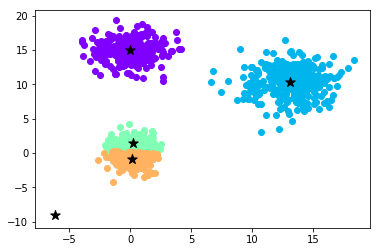

[array([-0.03825051, 14.91513187]),
 array([13.13339213, 10.31139304]),
 array([0.26689772, 1.40328855]),
 array([ 0.13684303, -0.94105671]),
 array([-6.2020146 , -8.98932345])]

In [8]:
k_means(data_pts=data_X, K_clustering_centers=5,num_iteration=10)